In [5]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
import relaxation_times as rt
import matplotlib.pyplot as plt
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

In [19]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field=850
magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"

## hMff 26.5.22
#folder_path="93_hMff_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_370ns_mahti_360ns_mahti_2940ns_no_solvent/"
#output_name="hMff_SDS_micelle.out"
#residues=24 # number of AA in a peptine, for take_all_in_folder="number"

## eYqjD 26.5.22
#folder_path="eYqjD_corr_fuc/"
#output_name="eYqjD_SDS_micelle.out"
#residues=20 # number of AA in a peptine, for take_all_in_folder="number"

## yFis1 26.5.22
folder_path="yFis1_corr_func/"
output_name="yFis1_SDS_micelle.out"
residues=26 # number of AA in a peptine, for take_all_in_folder="number"



author_name="Ricky Nencini"

In [4]:
###############
## CHANGE IN CODE 26.5.22, add an option to get directly corr. functions
###############
path="/home/ricky/Documents/from_work/MD/simulations/production_run/93_hMff_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_370ns_mahti_360ns_mahti_2940ns_no_solvent/"

def CalculateCorrelationFunctions(path,end):
    readme = path+ "/README.yaml"
    with open(readme) as yaml_file:
        readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
    
    
    ##### MAKE NDX FILE #####
    grofile=path+readme["FILES"]["gro"]["NAME"]
    readme["FILES"]["ndx_for_RT"]={}
    readme["FILES"]["ndx_for_RT"]["NAME"]="HN_for_RT.ndx"
    output_ndx=path+readme["FILES"]["ndx_for_RT"]["NAME"]
    with open(grofile, 'rt') as gro_file:
        residue=""
        residues=0
        with open(output_ndx, 'w') as fo:
            for line in gro_file:
                if 'Title' in line or len(line.split())==1 or len(line.split())==3:
                    pass
                else:    
                    
                    if line.split()[1]=="N":
                        residue=line.split()[0]
                        N=int(line.split()[2])
                    if line.split()[1]=="HN":
                        HN=int(line.split()[2])
                        if residue==line.split()[0]:
                            fo.write("[ {} ]\n {} {}\n".format(residue,N,HN))
                            residues+=1
    #########################
    
    ##### GET CORRELATION FUNCTIONS #####
    xtcfile=path+readme["FILES"]["xtc"]["NAME"]
    tprfile=path+readme["FILES"]["tpr"]["NAME"]
    
    new_folder=readme["FILES"]["xtc"]["NAME"][:-4] + "_" + str(int(end/1000))
    if os.path.isdir(new_folder):
        os.system("rm -r "+new_folder)
    os.system("mkdir " + new_folder)
    print("Number of corelation functions to calculate: {} \n".format(residues))
    for i in range(0,residues):
        print("Calculatin correlation function {}".format(i+1))
        os.system("echo " + str(i) + ' | gmx rotacf -f ' + xtcfile + ' -s ' + tprfile + '  -n ' + output_ndx + '  -o ' + new_folder + '/NHrotaCF_' + str(i) + ' -P 2 -d')
    

for end in [500000,1000000,1500000,2000000,2500000,2948110]:
    CalculateCorrelationFunctions(path,end)

Number of corelation functions to calculate: 24 

Calculatin correlation function 1
Calculatin correlation function 2
Calculatin correlation function 3
Calculatin correlation function 4
Calculatin correlation function 5
Calculatin correlation function 6
Calculatin correlation function 7
Calculatin correlation function 8
Calculatin correlation function 9
Calculatin correlation function 10
Calculatin correlation function 11
Calculatin correlation function 12
Calculatin correlation function 13
Calculatin correlation function 14
Calculatin correlation function 15
Calculatin correlation function 16
Calculatin correlation function 17
Calculatin correlation function 18
Calculatin correlation function 19
Calculatin correlation function 20
Calculatin correlation function 21
Calculatin correlation function 22
Calculatin correlation function 23
Calculatin correlation function 24
Number of corelation functions to calculate: 24 

Calculatin correlation function 1
Calculatin correlation function 2
C

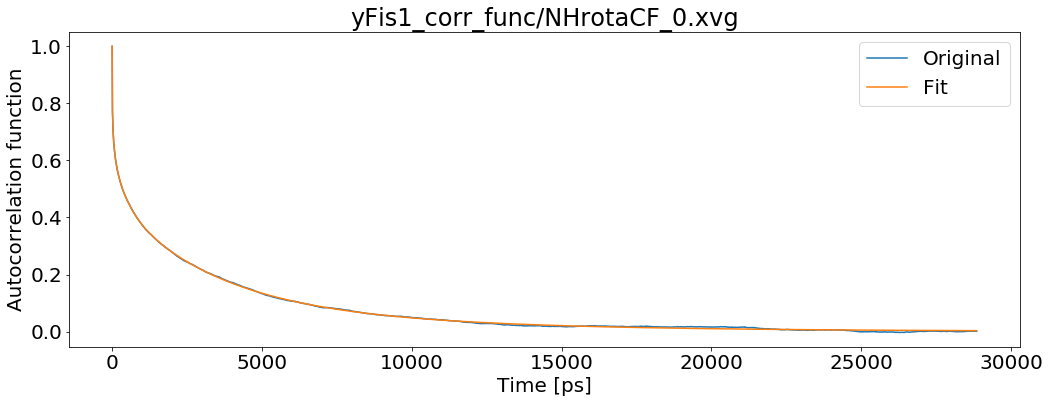

R1: 0.8452783016538661 R2: 0.22768851396598916 NOE: 0.3343081638107426


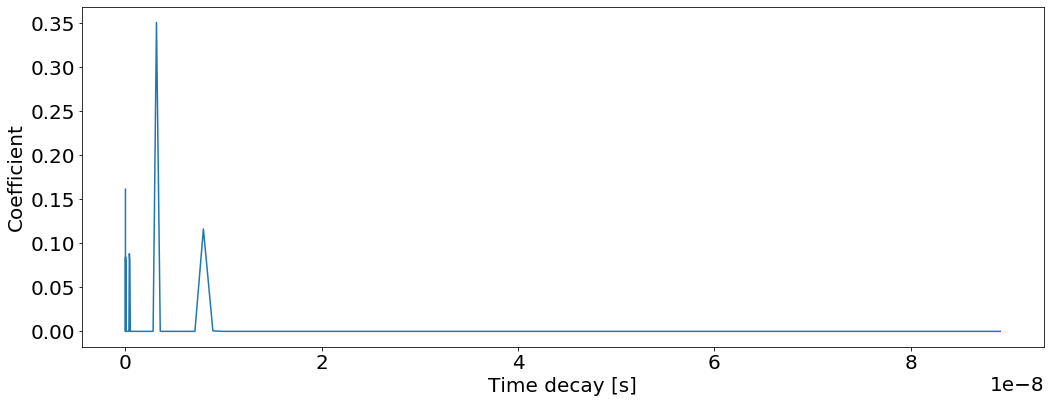

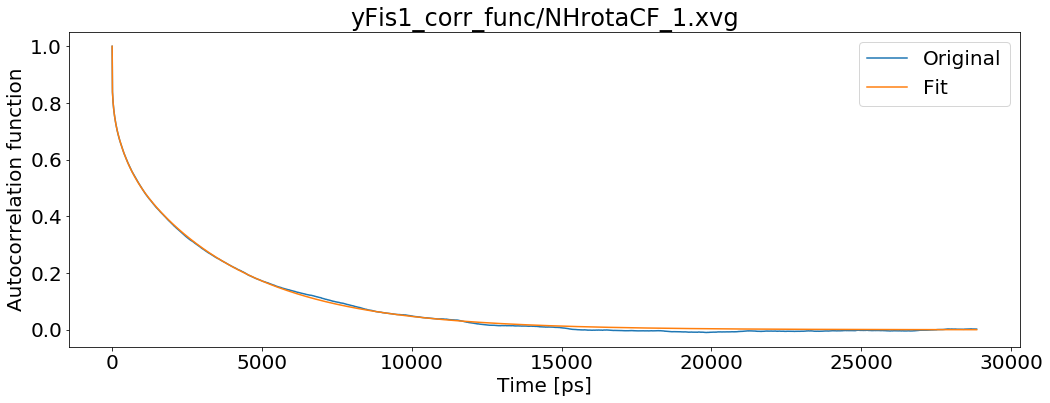

R1: 0.6880350968570538 R2: 0.19275841937563418 NOE: 0.5293166615911624


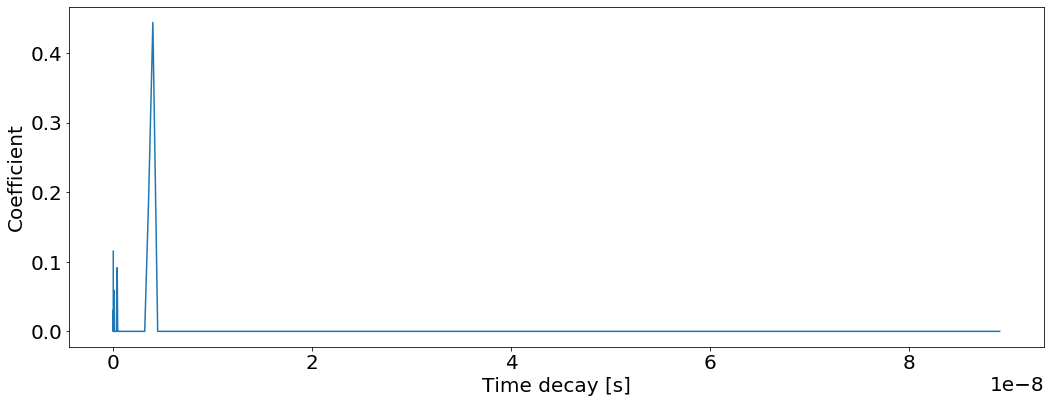

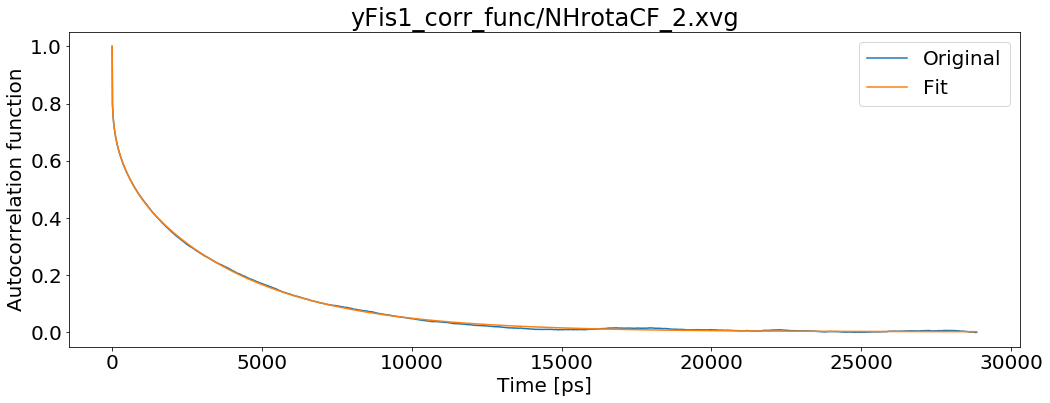

R1: 0.7490223783960128 R2: 0.18823203546727185 NOE: 0.5130260324411073


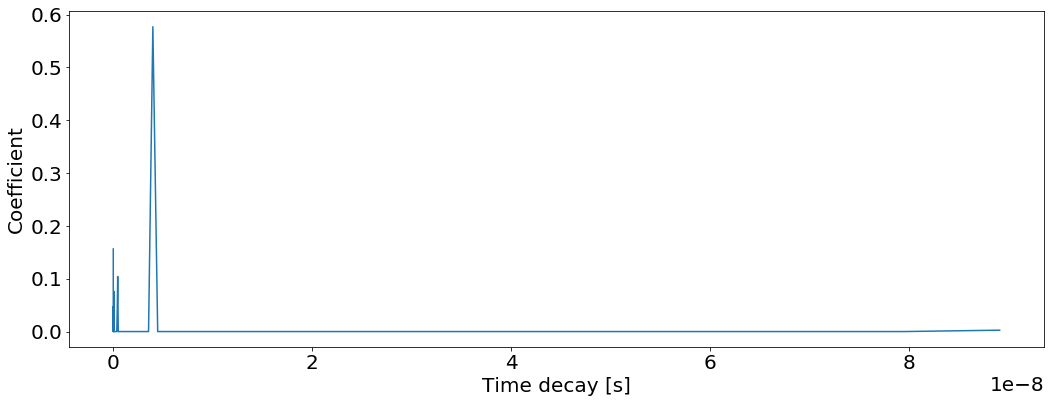

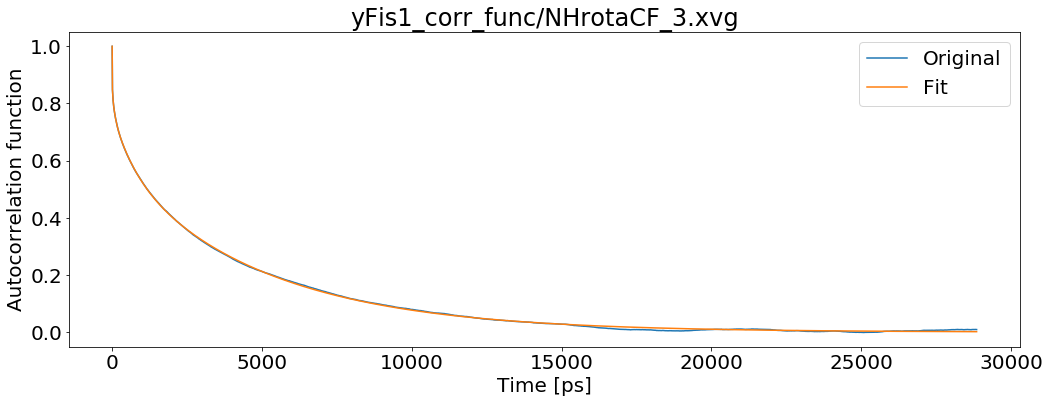

R1: 0.7399514846929771 R2: 0.1643838790102614 NOE: 0.5530085057501282


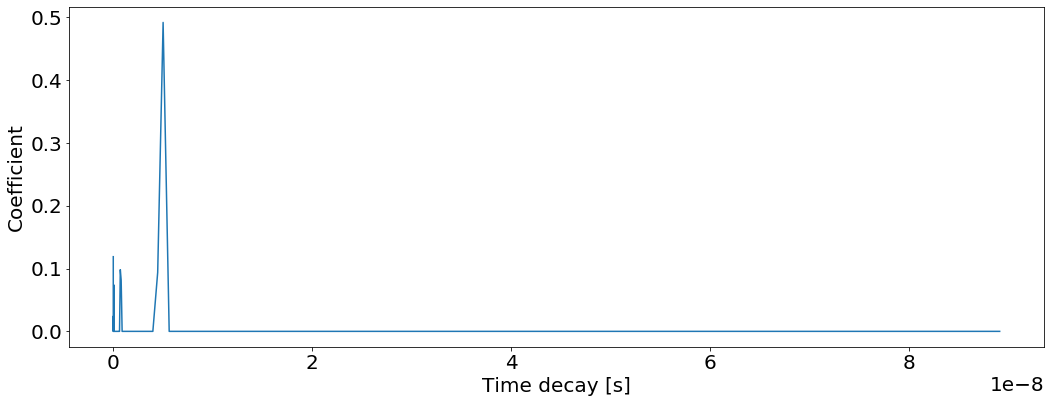

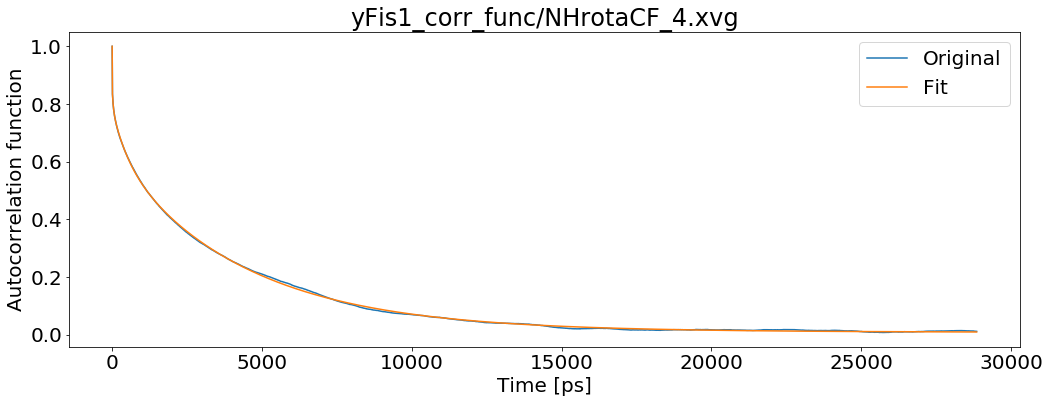

R1: 0.7260372689344134 R2: 0.13513696827385951 NOE: 0.571028539166804


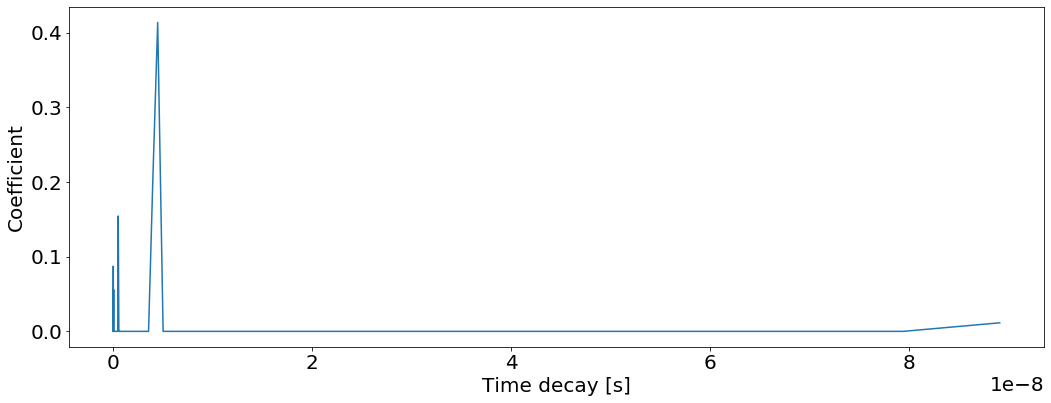

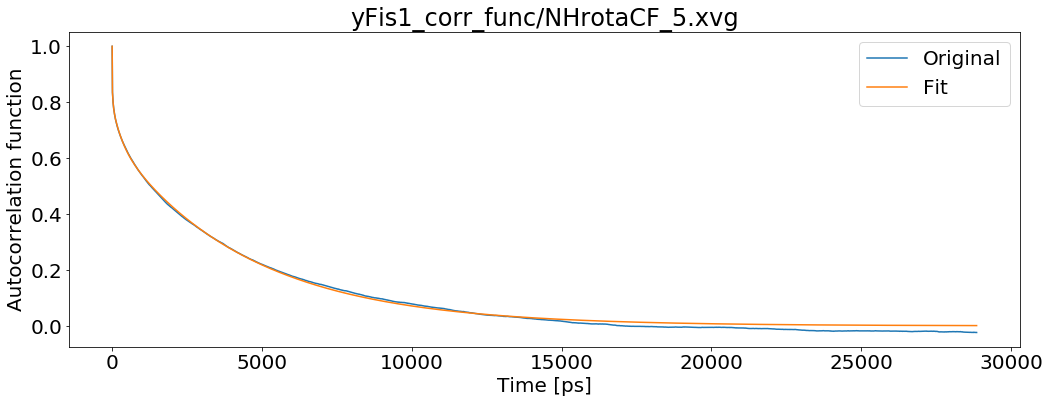

R1: 0.7457801363539447 R2: 0.1646025613678025 NOE: 0.559012597801371


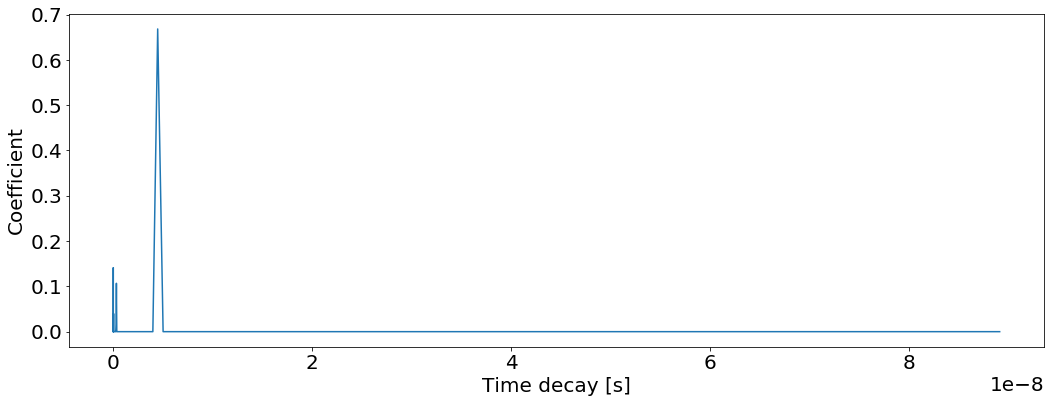

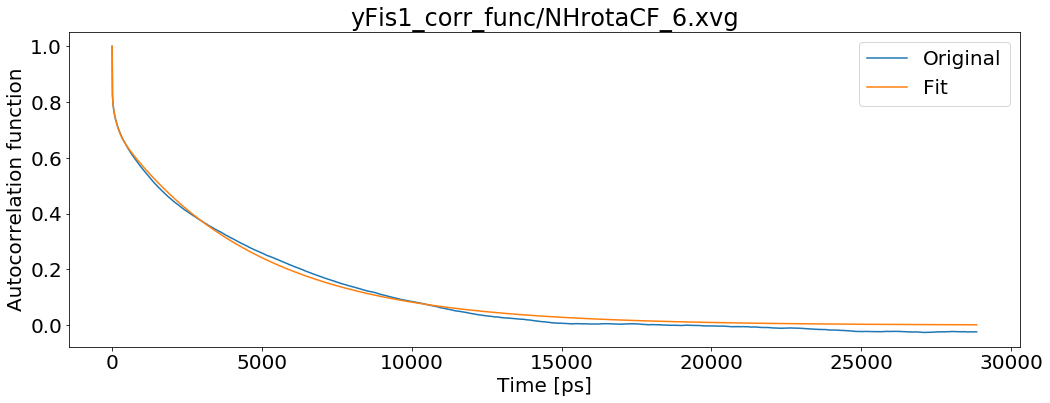

R1: 0.7674187338879912 R2: 0.15218941689313703 NOE: 0.6275966917006675


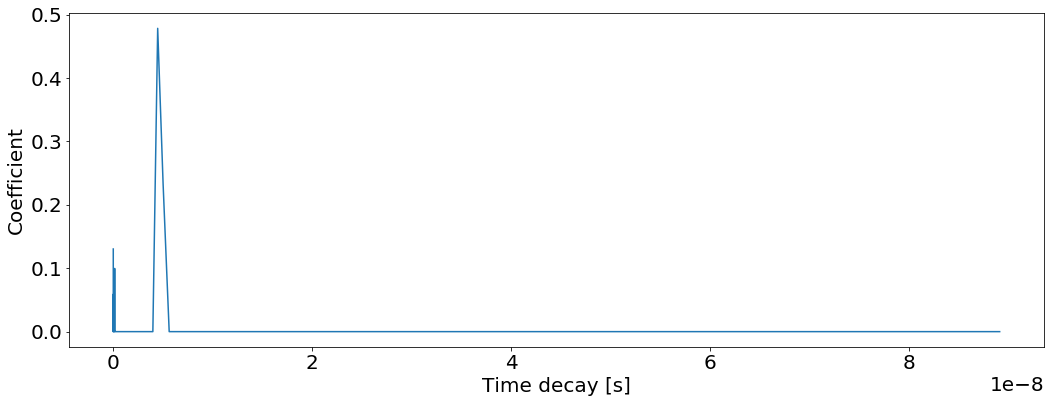

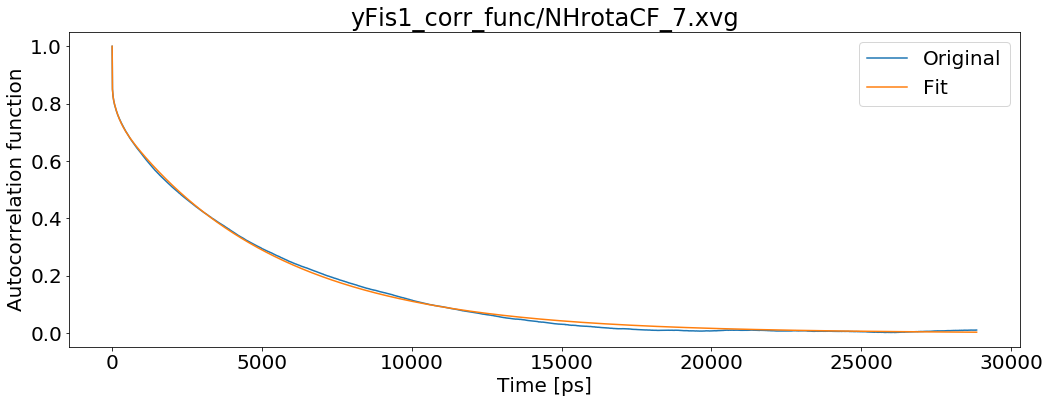

R1: 0.7853002728669466 R2: 0.12989369113589758 NOE: 0.6649992395325849


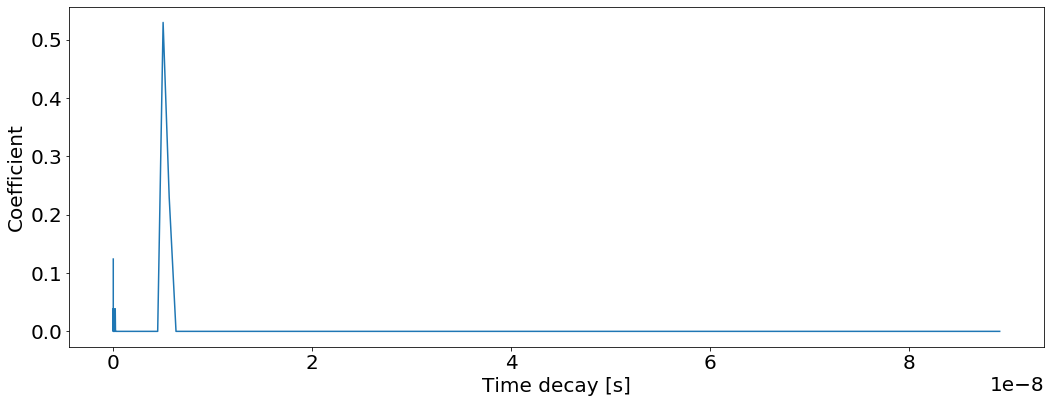

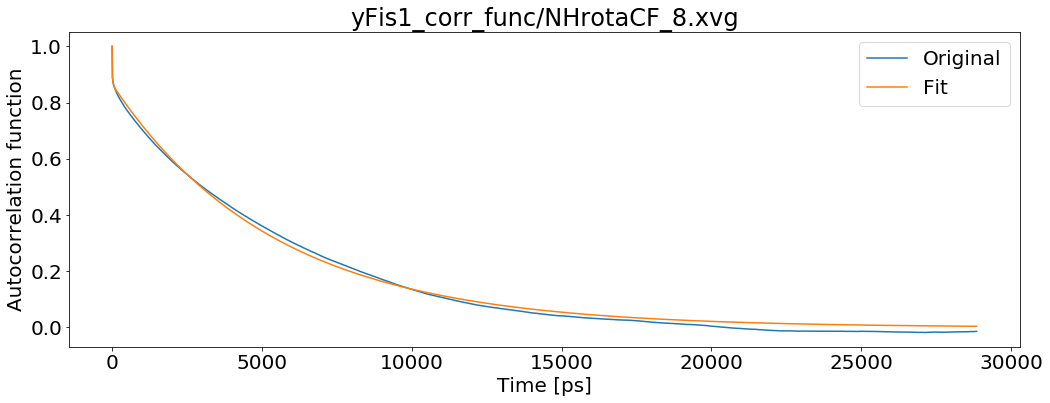

R1: 0.7512817064213808 R2: 0.1111311993752336 NOE: 0.8279442550824055


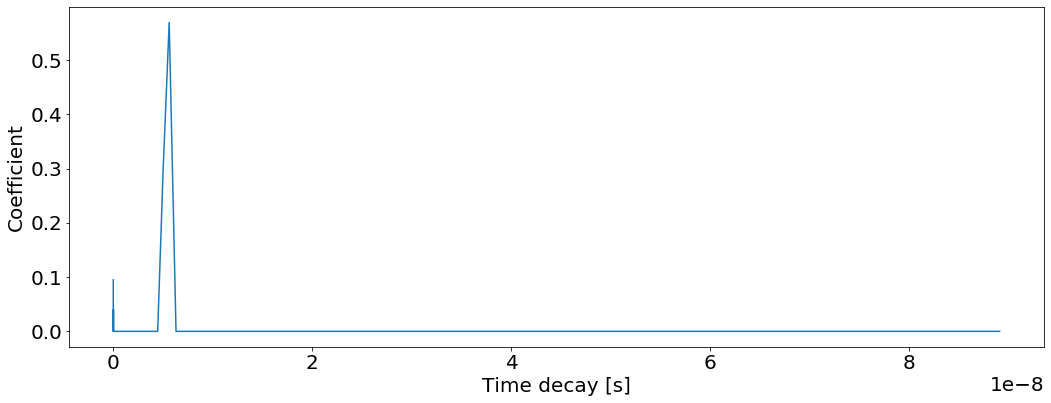

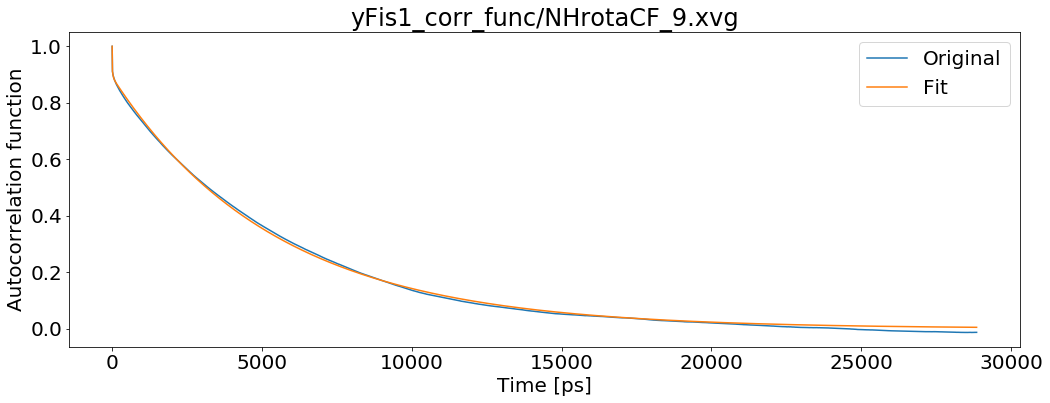

R1: 0.7325579320948183 R2: 0.10735235346163996 NOE: 0.8290519954375544


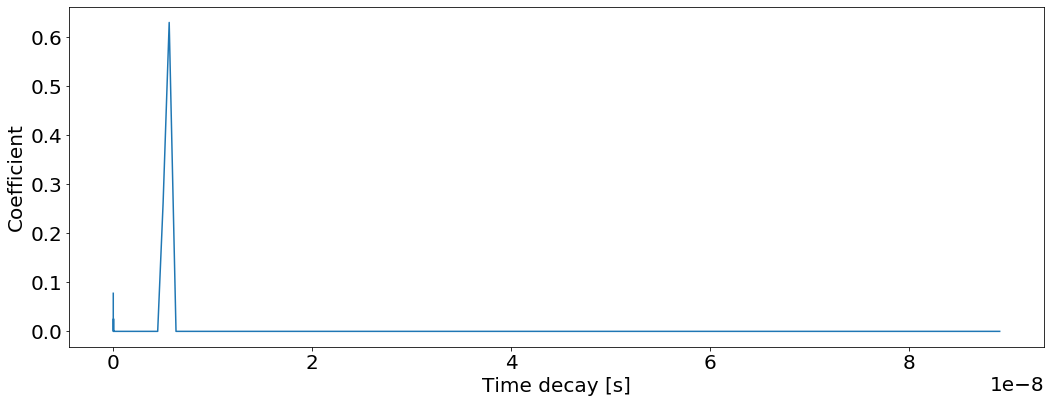

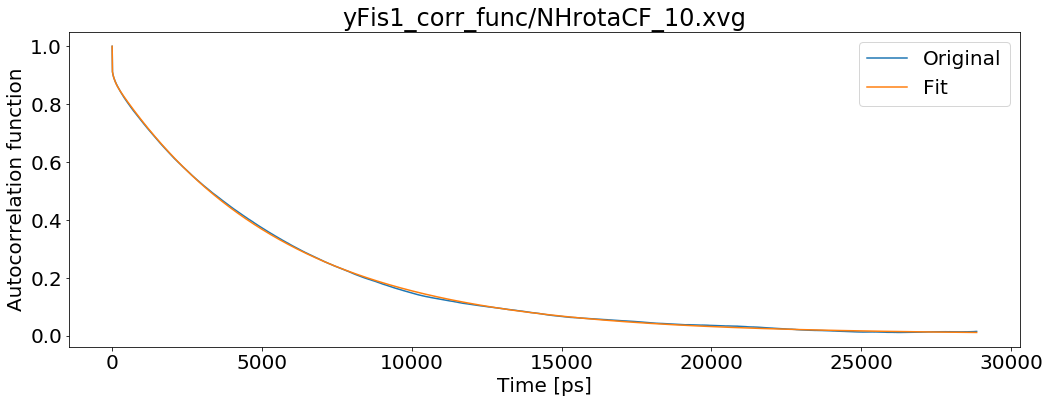

R1: 0.7577429580381109 R2: 0.09284026723794139 NOE: 0.8032179639975912


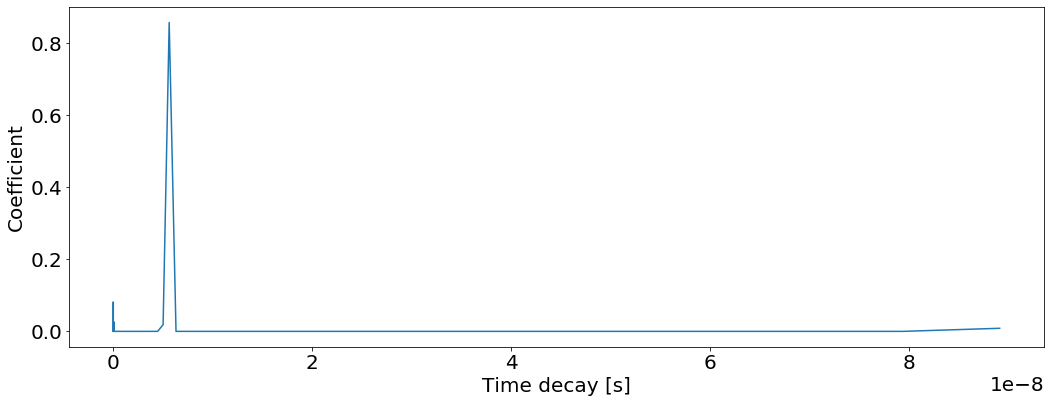

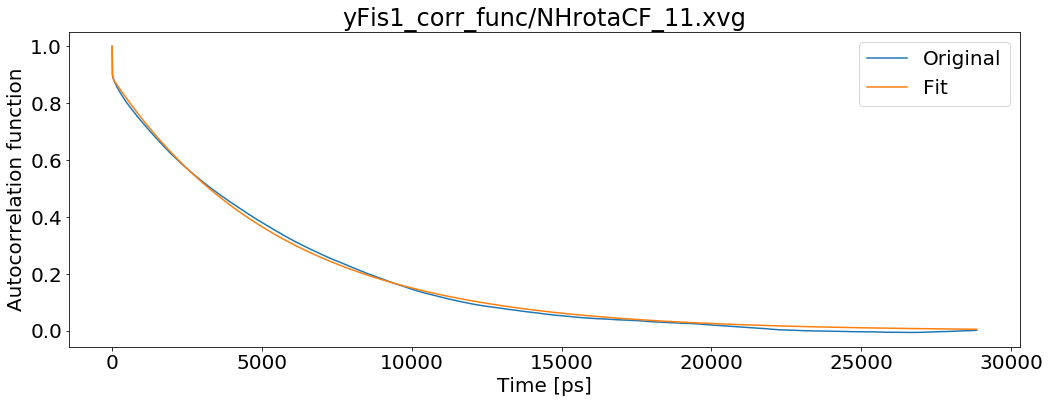

R1: 0.756157556982493 R2: 0.10459822926767347 NOE: 0.8398721287800857


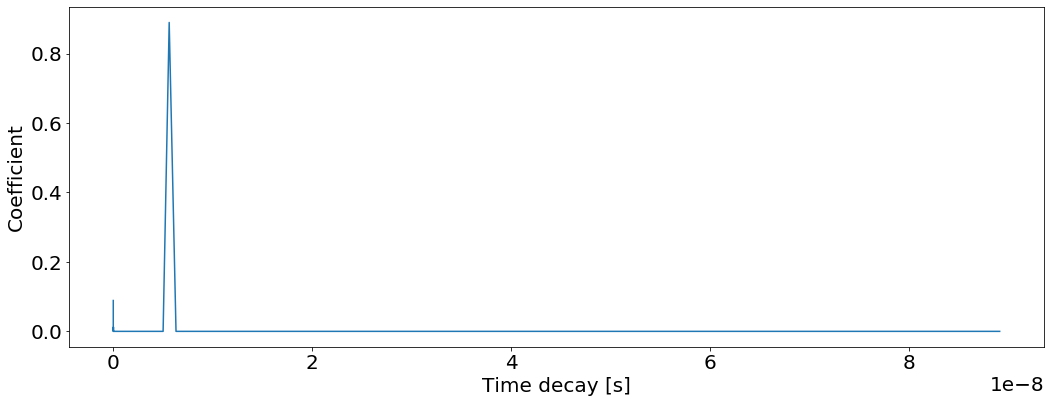

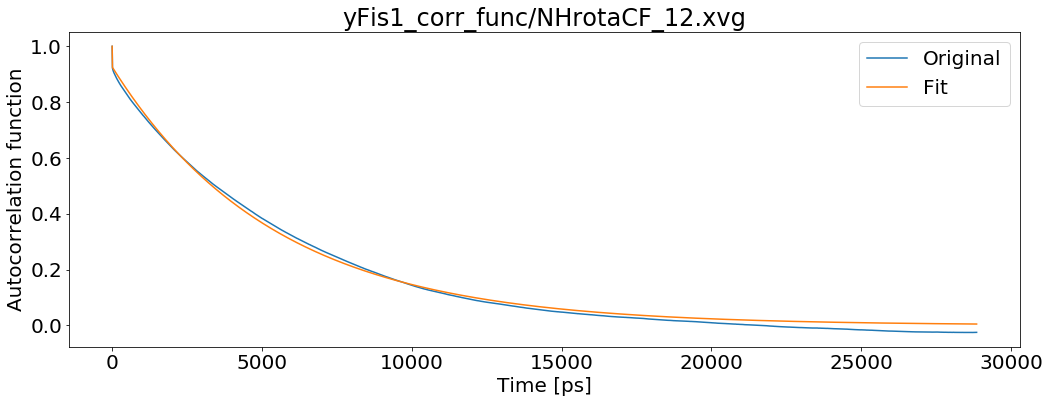

R1: 0.7049453744728377 R2: 0.10384244646106777 NOE: 0.8460561596520624


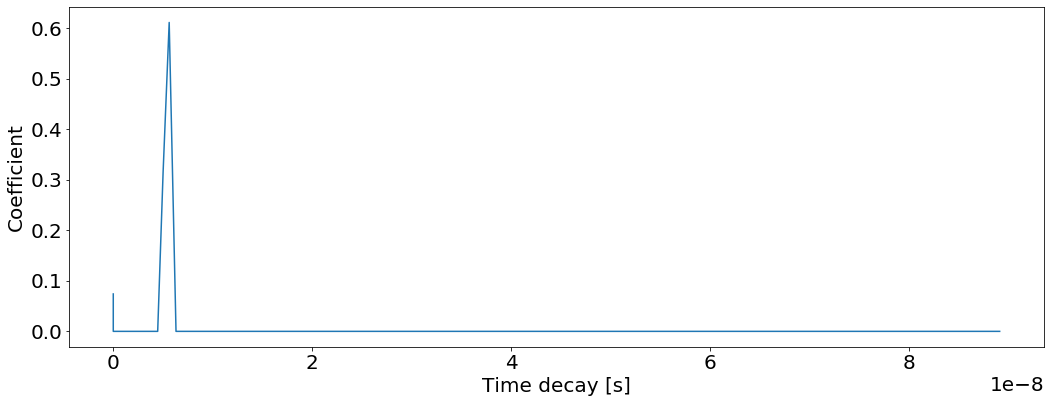

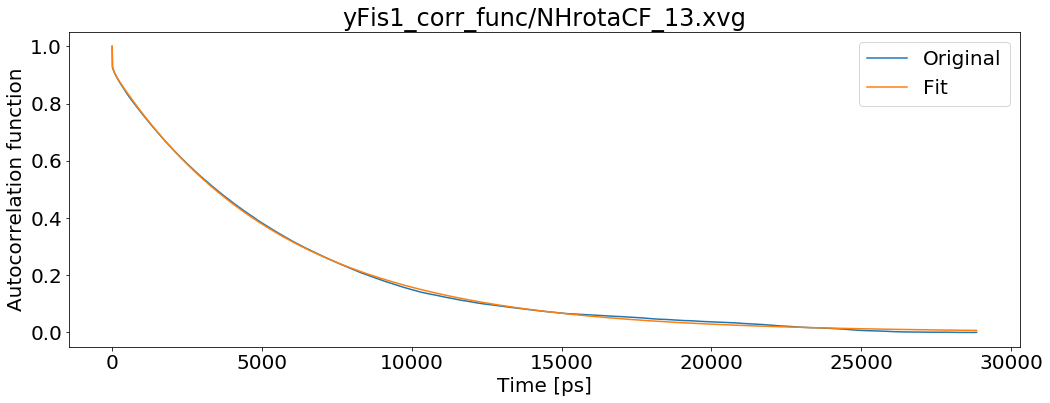

R1: 0.7357531890818294 R2: 0.10009696928360416 NOE: 0.8306761999006481


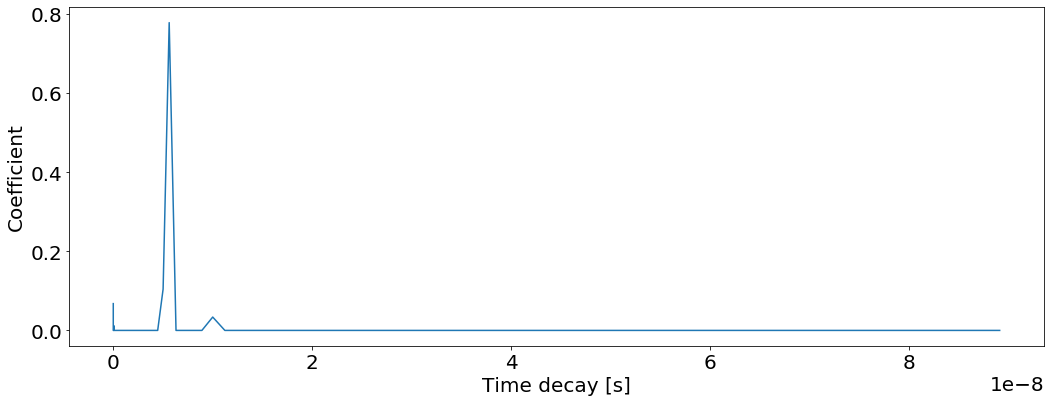

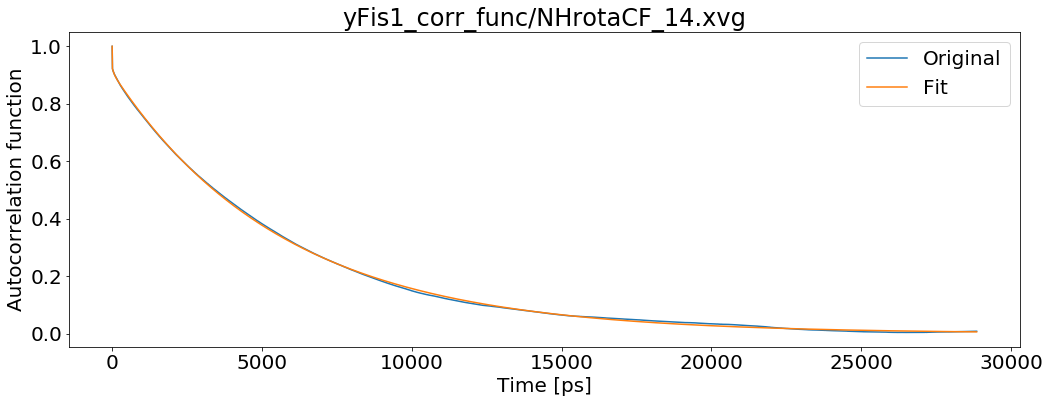

R1: 0.74465650972396 R2: 0.10117943907989643 NOE: 0.8271298119013732


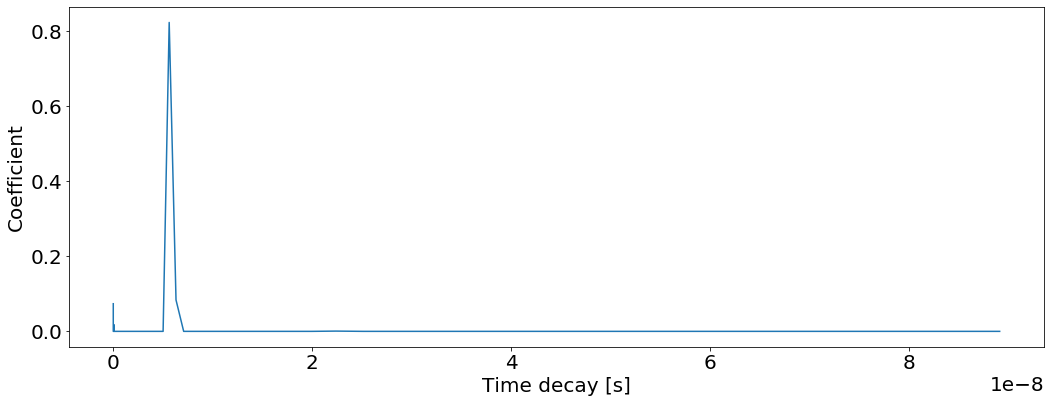

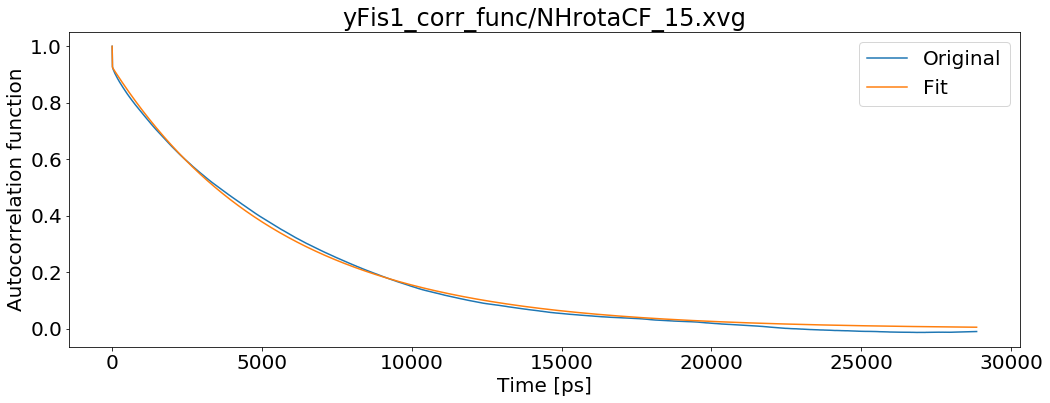

R1: 0.7227605335611993 R2: 0.10103954703013562 NOE: 0.8444615233063099


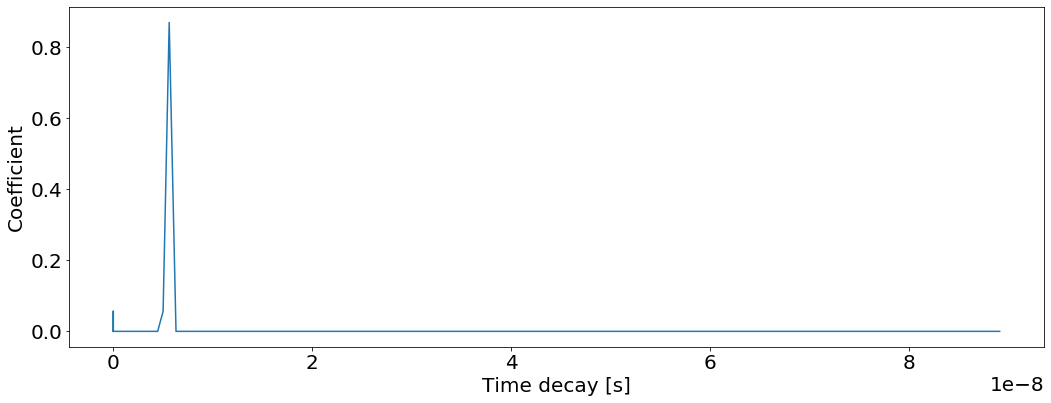

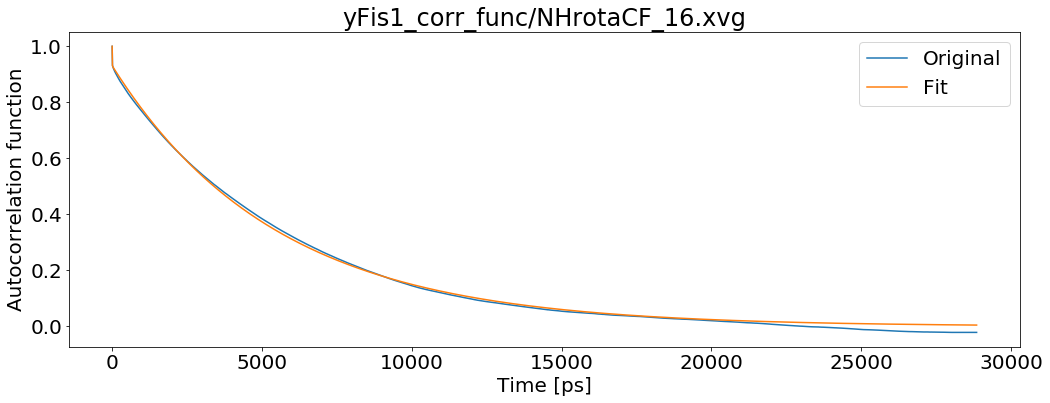

R1: 0.7083252927276943 R2: 0.10225321887564853 NOE: 0.8448445708641797


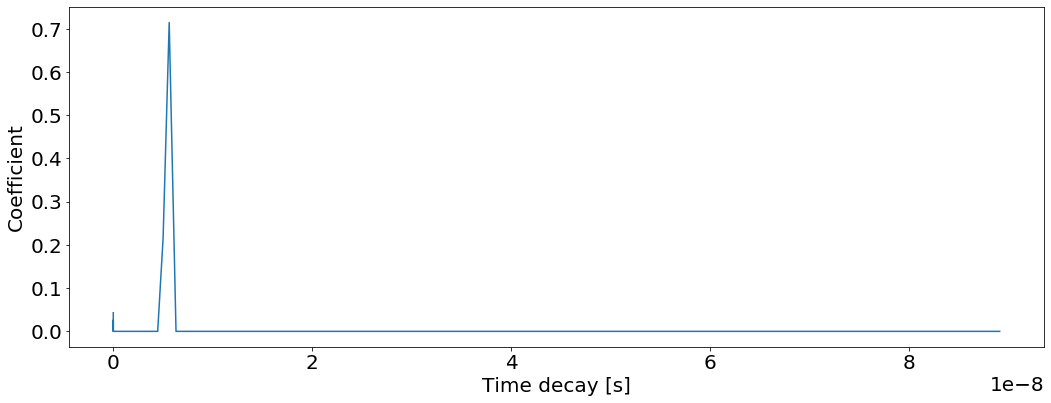

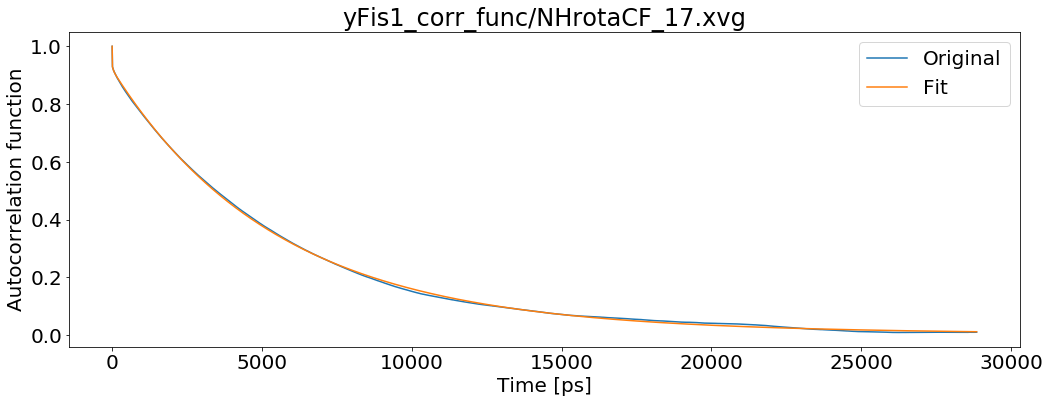

R1: 0.7282827348896781 R2: 0.09595178233563555 NOE: 0.8354025284982638


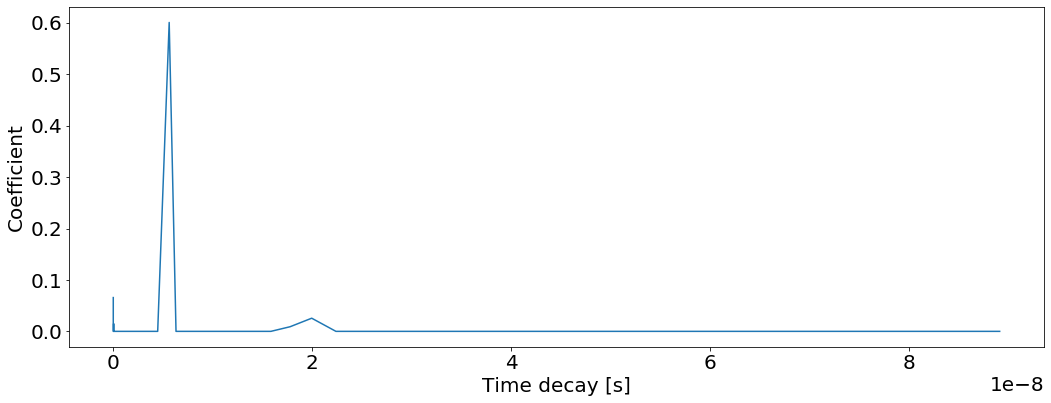

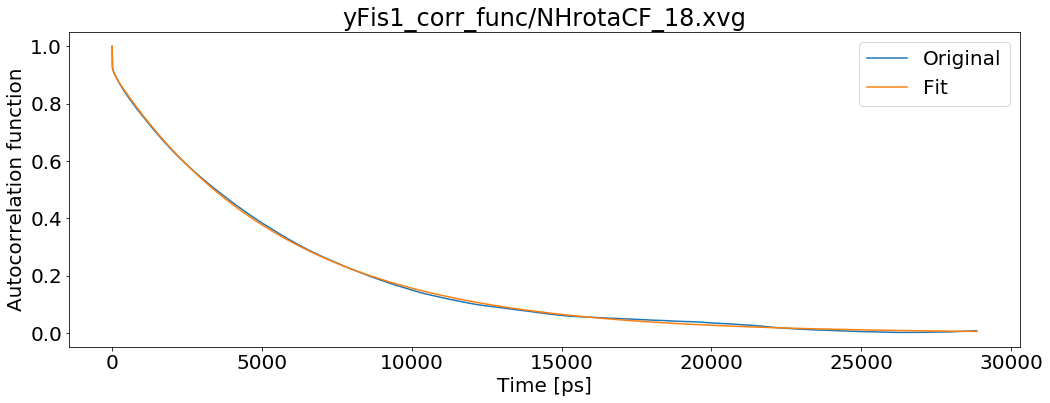

R1: 0.7424794494269669 R2: 0.10124474885998708 NOE: 0.8261176419665511


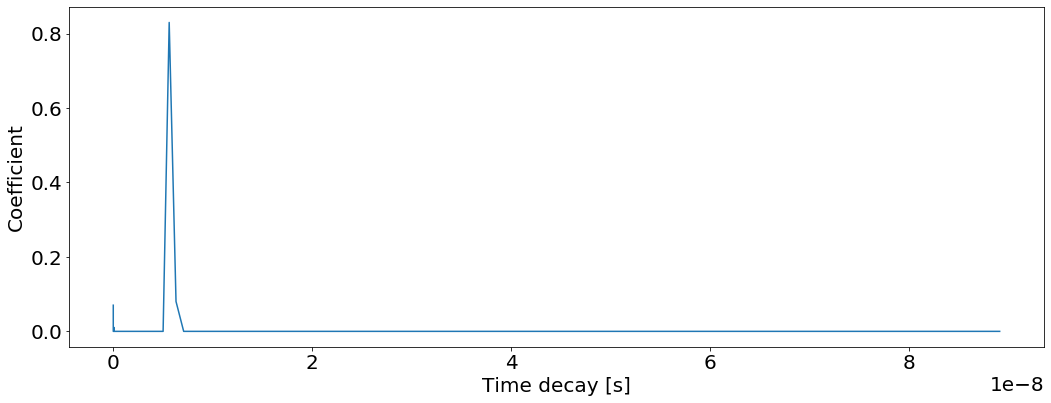

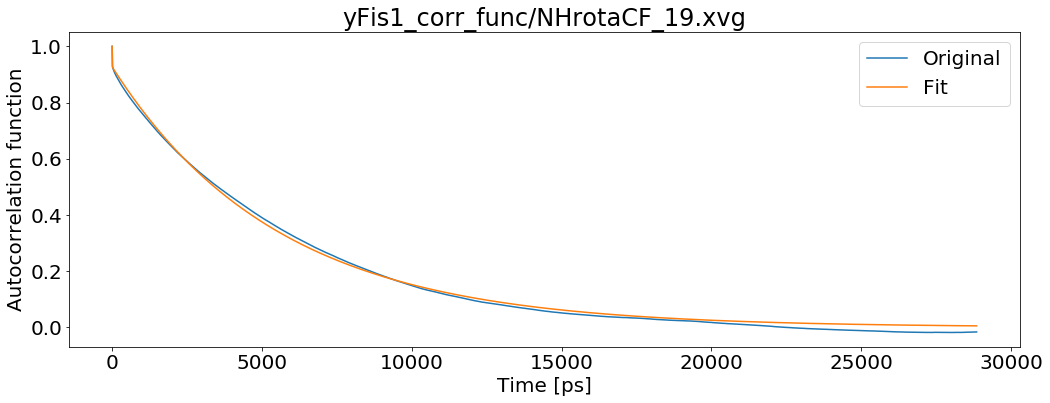

R1: 0.7163519736402102 R2: 0.10189316179147191 NOE: 0.8444347348451172


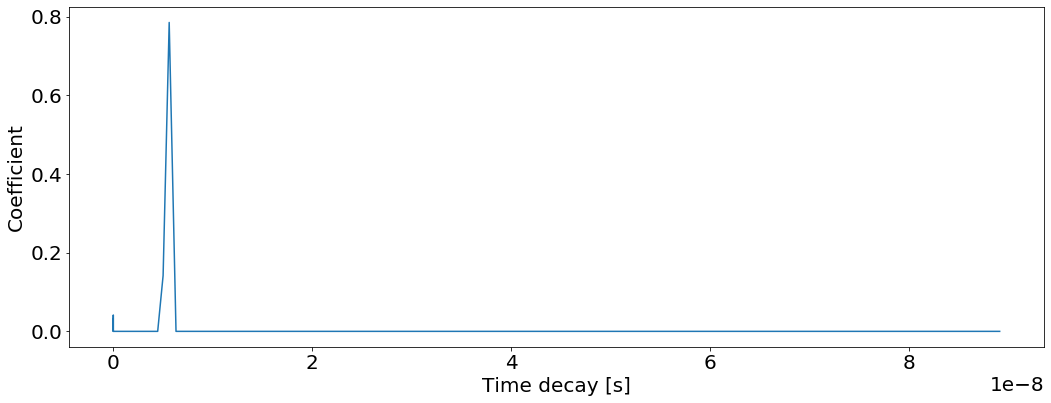

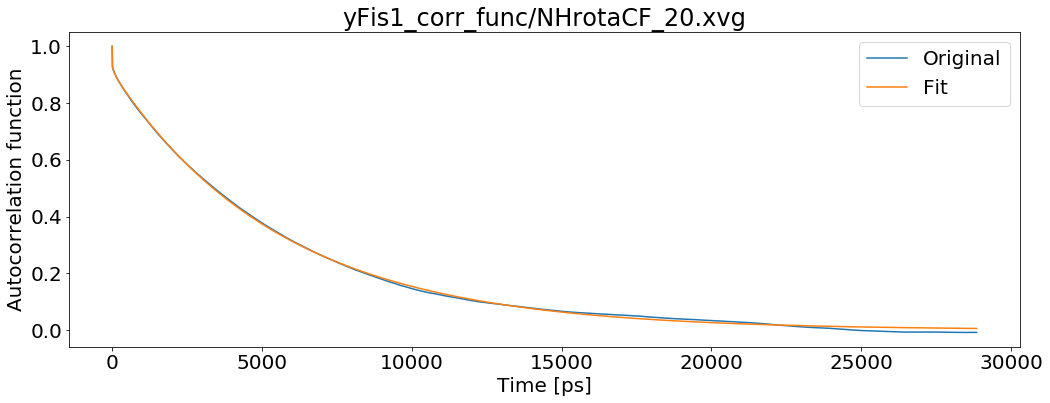

R1: 0.7344872891031997 R2: 0.10220726563425755 NOE: 0.8159182786350196


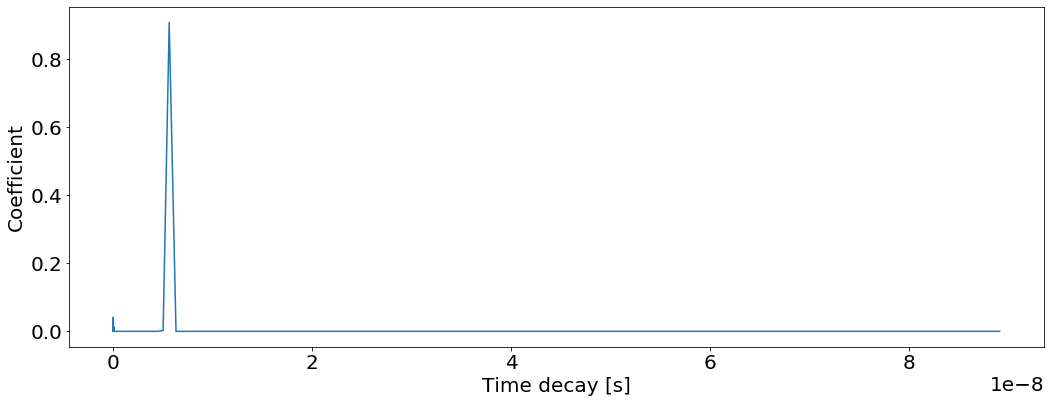

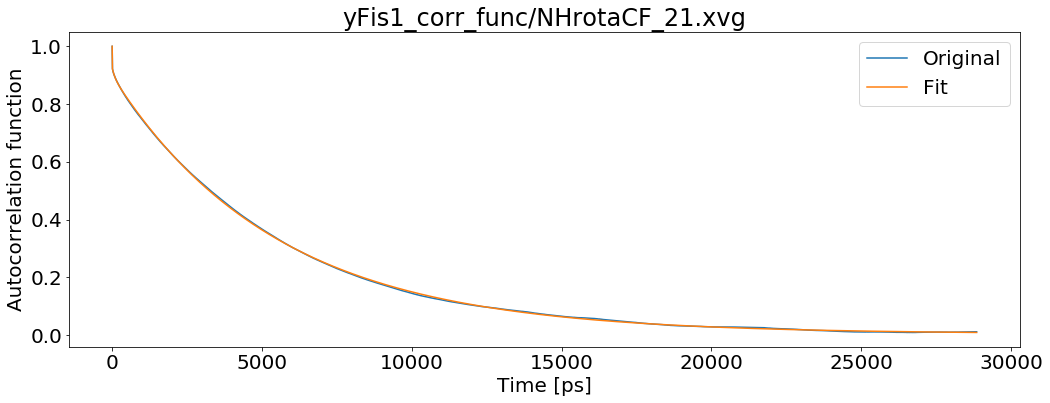

R1: 0.73116349308027 R2: 0.09782742989712406 NOE: 0.8039985420261454


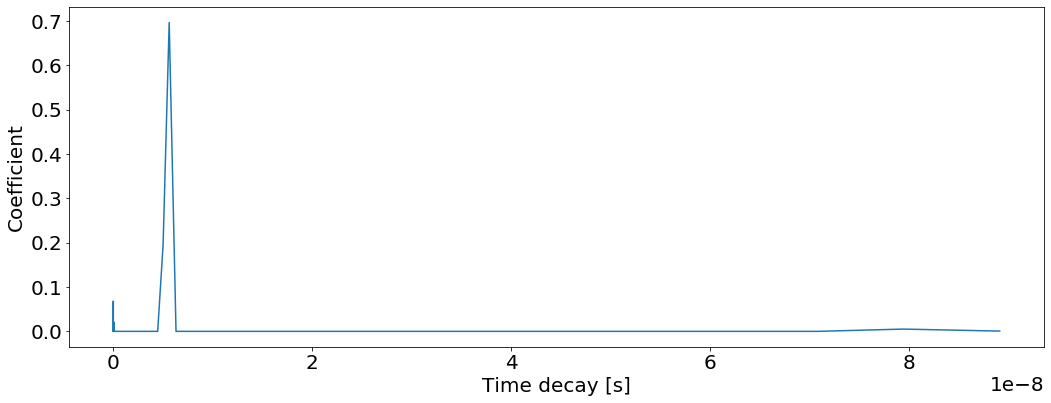

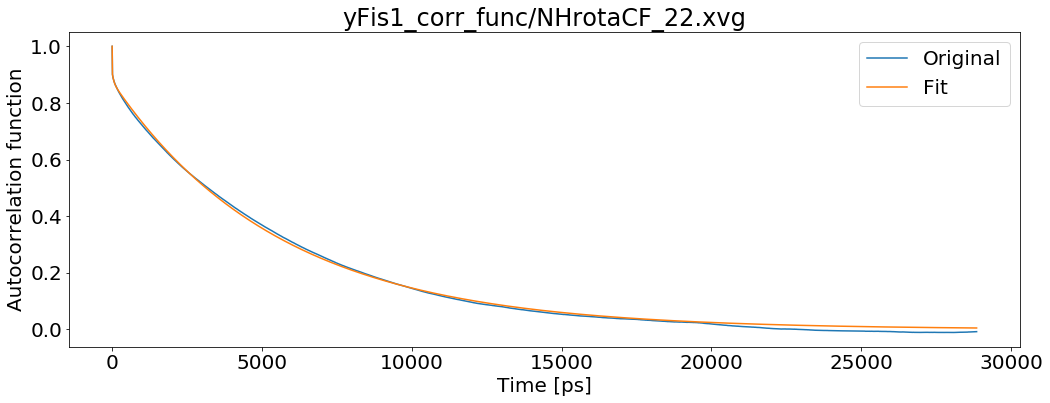

R1: 0.7599615572931412 R2: 0.1068262348476342 NOE: 0.8137848795446608


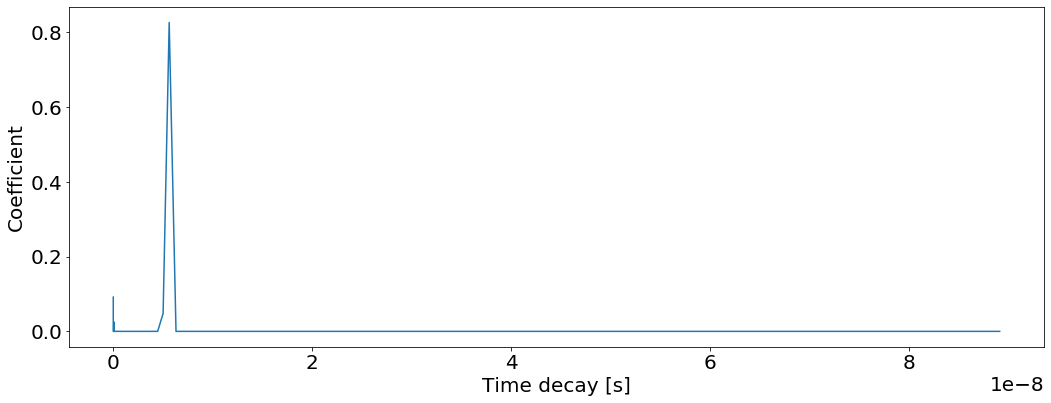

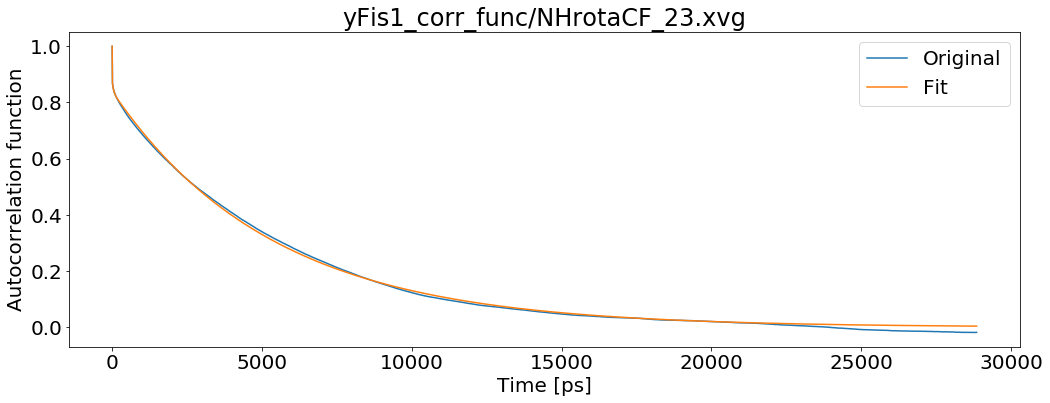

R1: 0.7656354554316392 R2: 0.11529537234016767 NOE: 0.8128312596542755


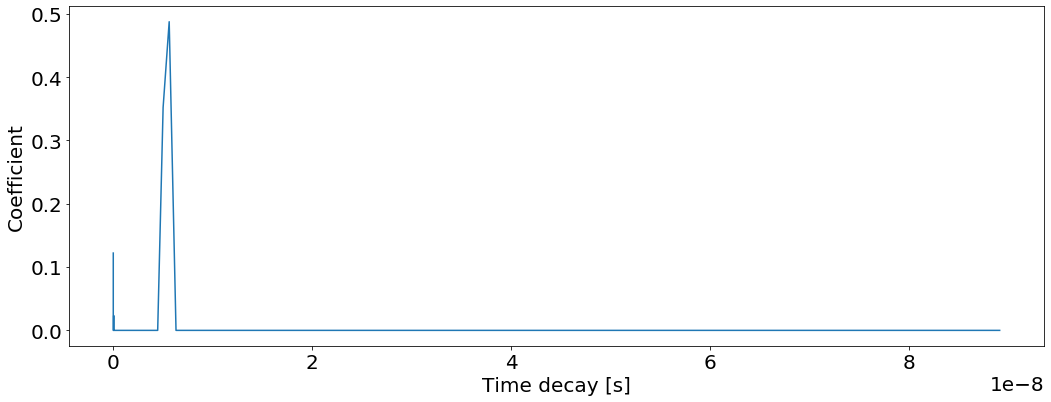

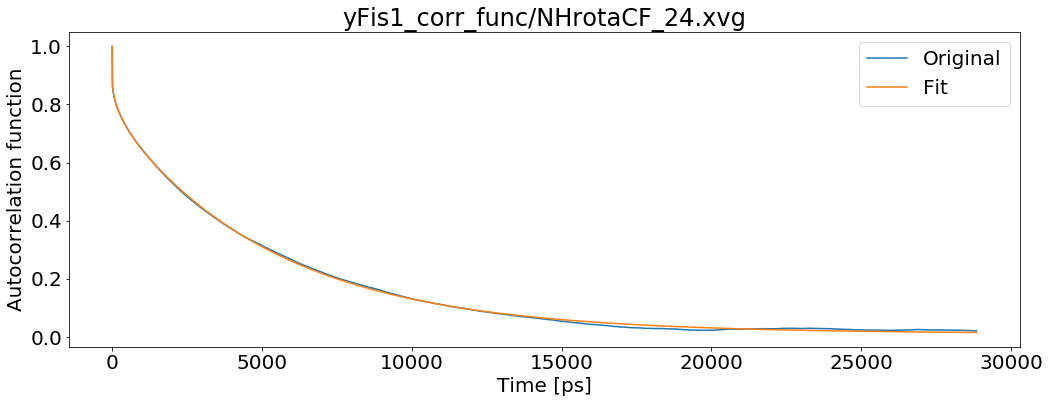

R1: 0.7918037192609088 R2: 0.09650293752761623 NOE: 0.678117438697357


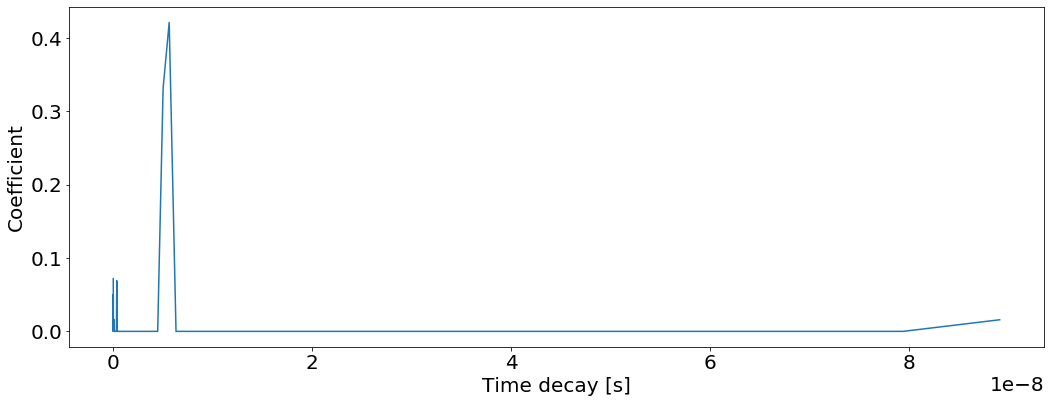

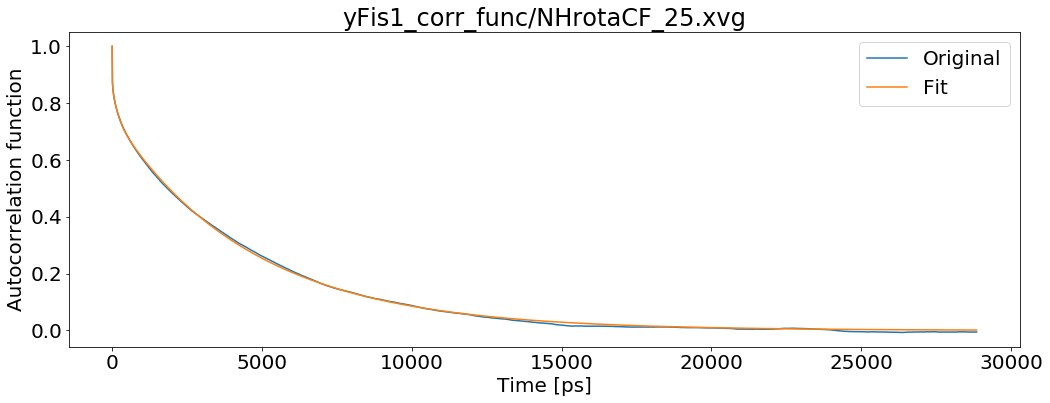

R1: 0.7099866203243134 R2: 0.14426548159997524 NOE: 0.6264540685113642


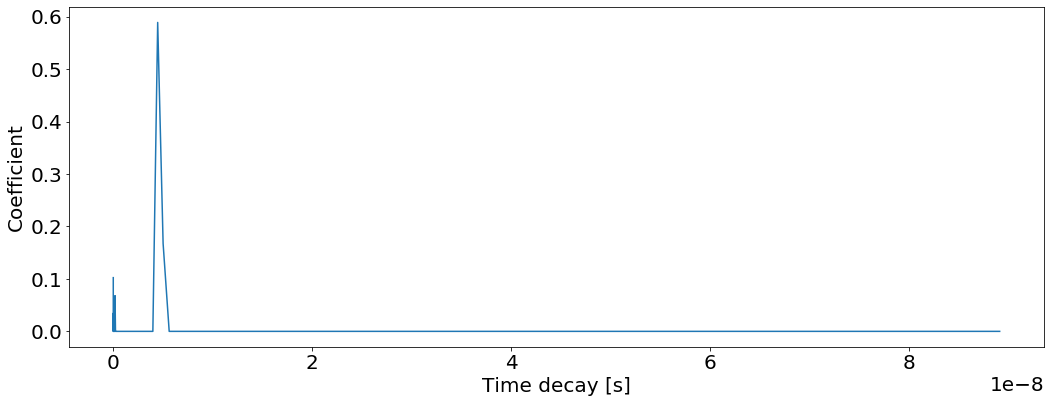

In [20]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

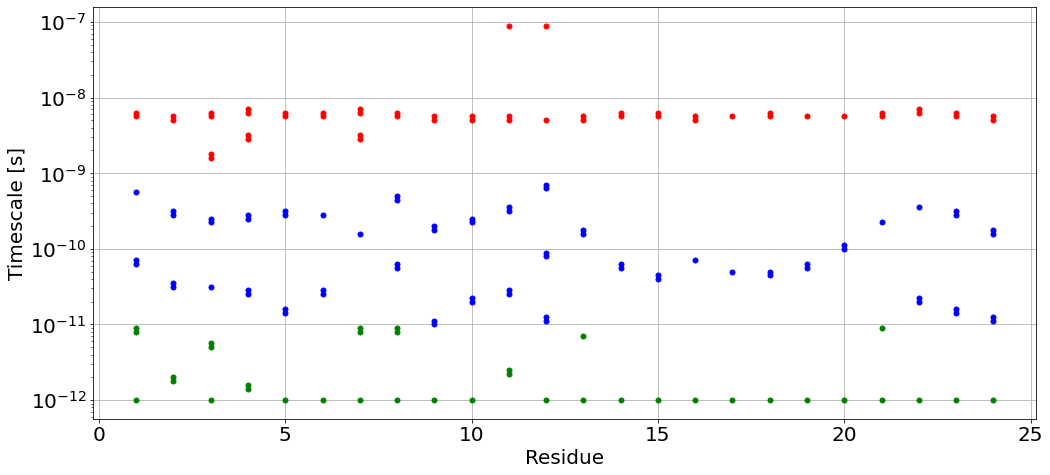

In [45]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.grid()
plt.yscale('log')
plt.ylabel("Timescale [s]")
plt.xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
        
plt.show()




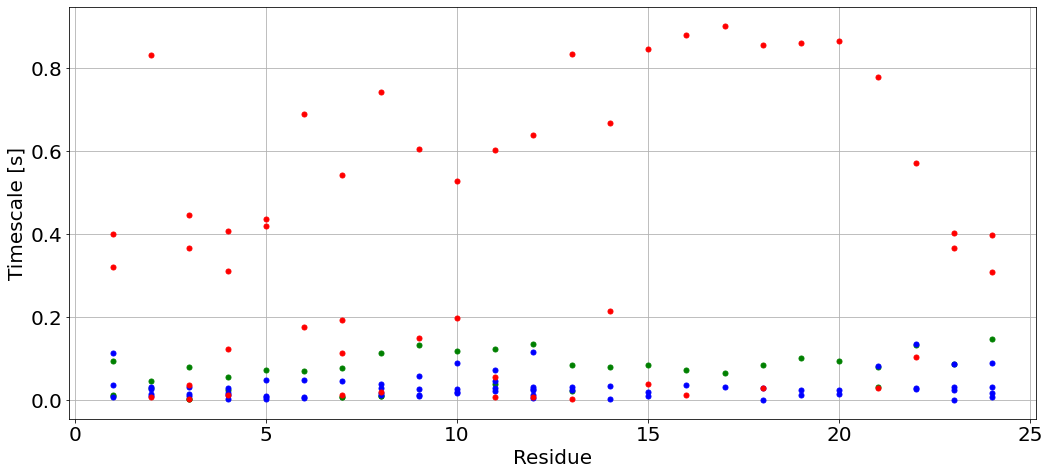

In [47]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.grid()

plt.ylabel("Coefficient's weights")
plt.xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
        
plt.show()


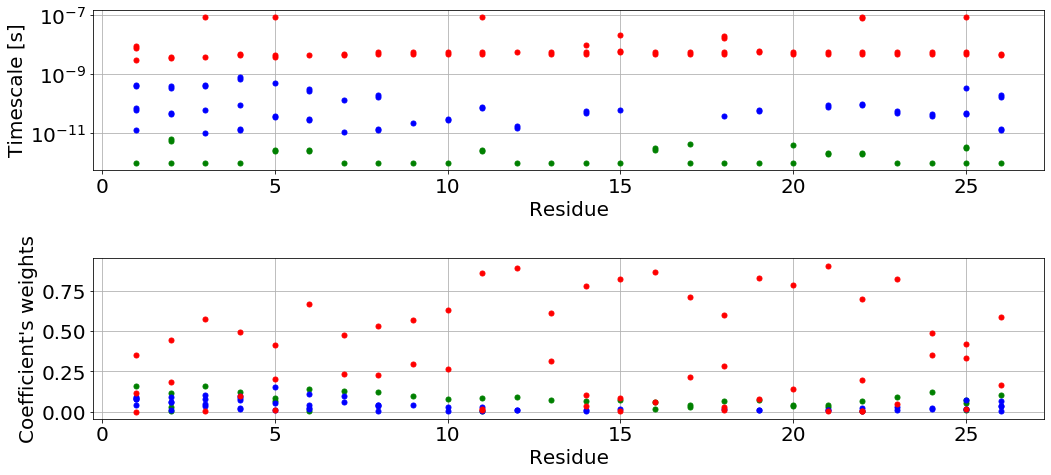

In [21]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

